In [41]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [42]:
d_p = 450
d_V = 450
epochs = 3  


In [43]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(d_p,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(d_V, activation='relu'),
])



In [44]:
folder_path = "data/test_data/example_data/burgers2d/"

In [45]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-17 02:02:01,692 - sciml.model.deeponet.deeponet - INFO - Model initialized with 3 epochs, 32 batch size, 0.001 learning rate


In [46]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 7028.58it/s]


In [47]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 450)
(40, 4500, 3)
(40, 9000)


In [48]:
train_history = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 7728.23it/s]
2025-03-17 02:02:02.003653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [40,9000]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/3 [00:00<?, ?it/s]2025-03-17 02:02:02.021904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,9000]
	 [[{{node Placeholder/_2}}]]
2025-03-17 02:02:02.260917: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at mkl_einsum_op.cc:205 : INVALID_ARGUMENT: Expected dimension 40 at axis 2 of the input sha

InvalidArgumentError: {{function_node __wrapped____MklEinsum_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expected dimension 40 at axis 2 of the input shaped [32,4500,450] but got dimension 450 [Op:Einsum]

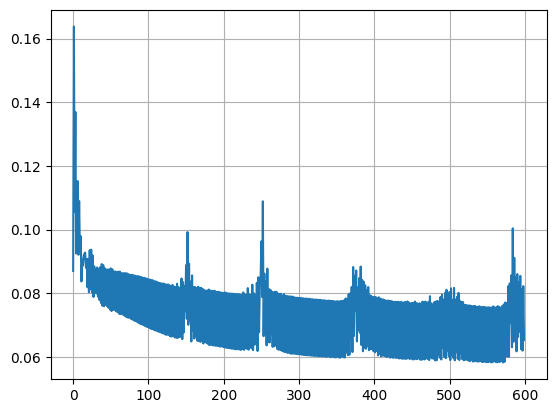

In [28]:
plt.plot(train_history)
plt.grid()
plt.show()